# Movie Data Analysis

## Visualizations

### 1. Average Movie Score by Country
A horizontal bar chart showing the **average movie score** for countries with at least **10 films**.

### 2. Evolution of Average Movie Scores Over Time
A line plot displaying the **average movie score** per year, filtered to include only years with at least **50 films**.


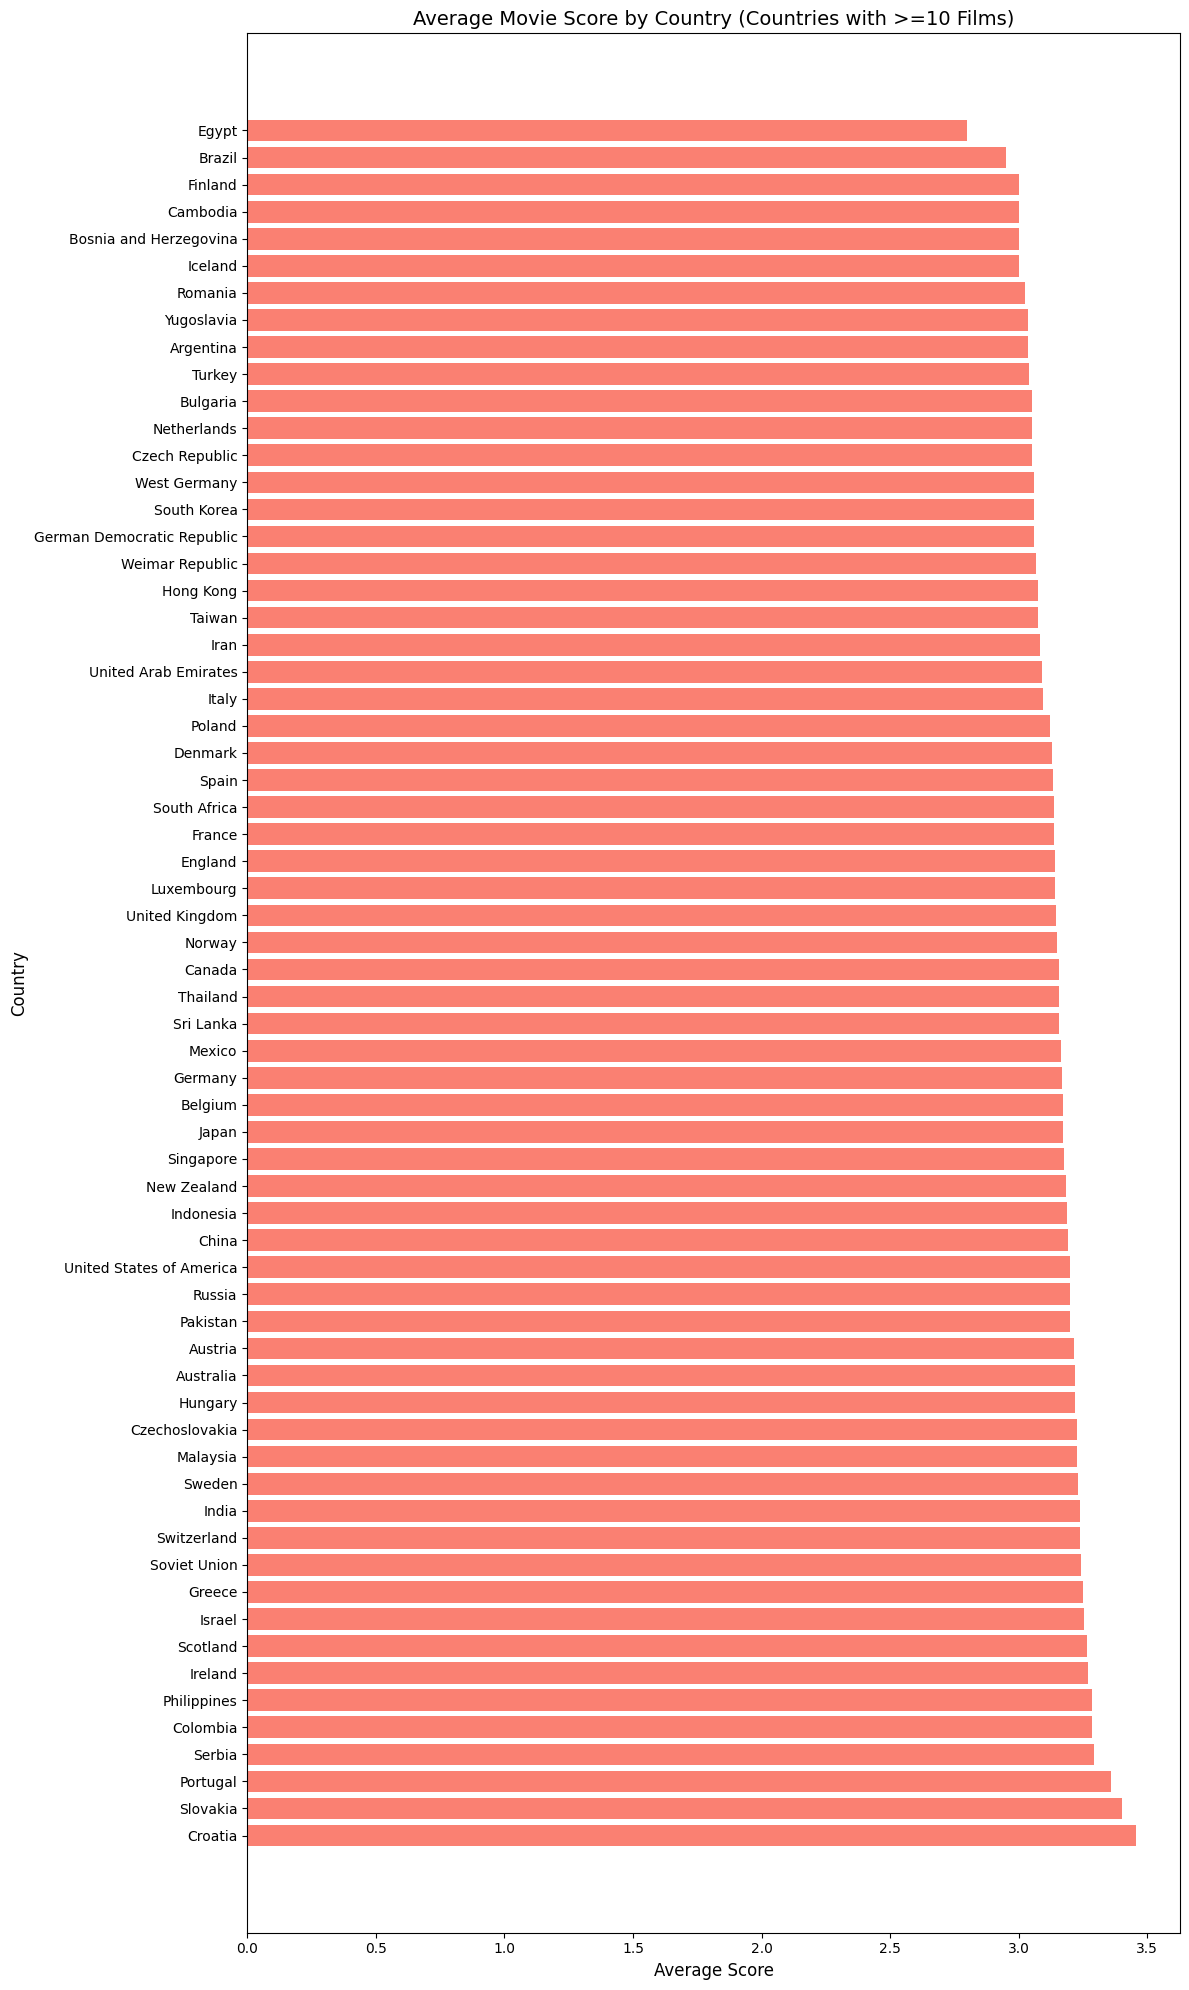

In [8]:
import pandas as pd
import matplotlib.pyplot as plt

file_path = '../../src/data/movies_dataset_final.tsv'
movies_df = pd.read_csv(file_path, sep='\t')

# Split the 'Movie countries' column into individual countries
movies_df = movies_df.assign(Country=movies_df['Movie countries'].str.split(", ")).explode('Country')

# Calculate average score and film count per country
country_stats = movies_df.groupby('Country').agg(
    Average_Score=('Score', 'mean'),
    Film_Count=('Score', 'size')
).sort_values(by='Average_Score', ascending=False)

# Filter countries with at least 10 films
country_stats_10_plus = country_stats[country_stats['Film_Count'] >= 10]

# Plot for countries with at least 10 films
plt.figure(figsize=(12, 20))
plt.barh(country_stats_10_plus.index, country_stats_10_plus['Average_Score'], color='salmon')
plt.ylabel('Country', fontsize=12)
plt.xlabel('Average Score', fontsize=12)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.title('Average Movie Score by Country (Countries with >=10 Films)', fontsize=14)
plt.tight_layout()
plt.show()


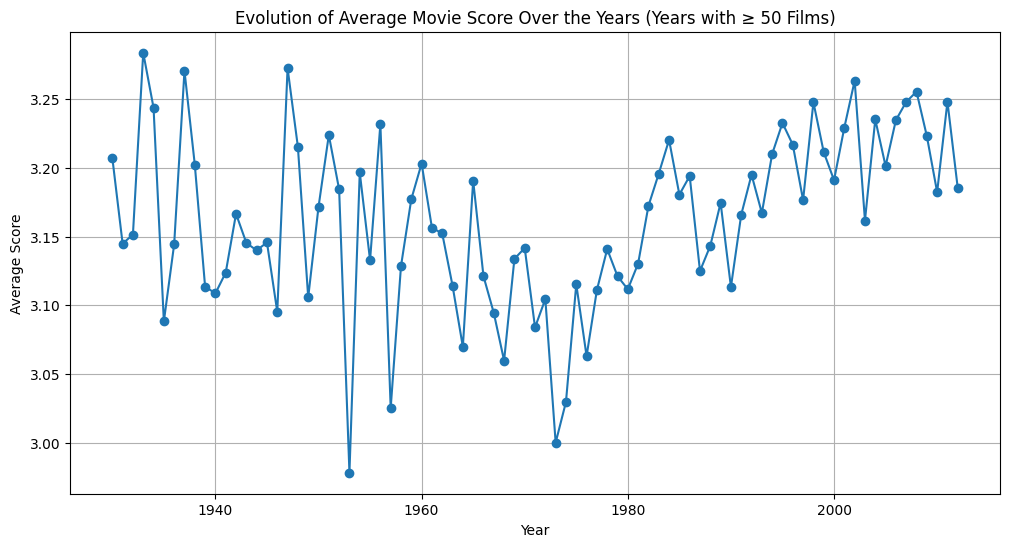

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

file_path = '../../src/data/movies_dataset_final.tsv'
movies_df = pd.read_csv(file_path, sep='\t')

score_and_count_by_year = movies_df.groupby('Movie release date').agg(
    Average_Score=('Score', 'mean'),
    Film_Count=('Score', 'size')
)

filtered_data = score_and_count_by_year[score_and_count_by_year['Film_Count'] >= 50]

plt.figure(figsize=(12, 6))
plt.plot(filtered_data.index, filtered_data['Average_Score'], marker='o', linestyle='-')
plt.title('Evolution of Average Movie Score Over the Years (Years with ≥ 50 Films)')
plt.xlabel('Year')
plt.ylabel('Average Score')
plt.grid(True)
plt.show()
